In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

In [3]:
# 1. Download data from: https://archive.ics.uci.edu/ml/datasets/Air+Quality#
df = pd.read_csv('AirQualityUCI.csv',sep=";",decimal=',')

In [4]:
# Change datetype in column 'Date' to datetime with DAY-MONTH-YEAR format
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [5]:
# Group by column 'Date' and counting mean - observations from different hours get cut to a single one
df = df.groupby('Date').mean().reset_index()

Text(0, 0.5, 'RH [%]')

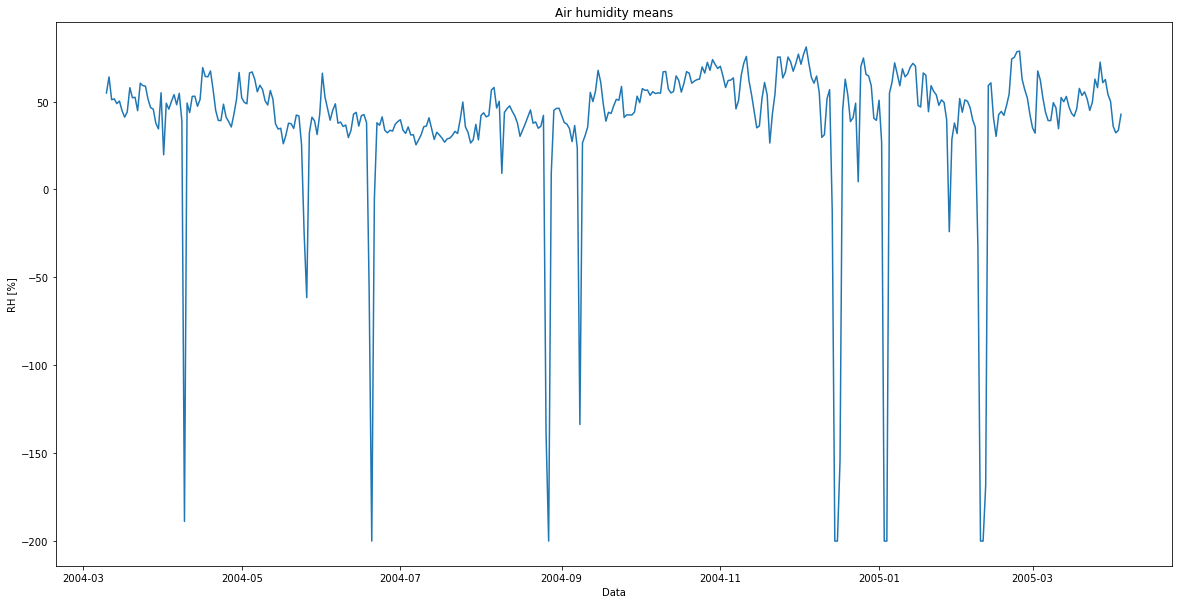

In [6]:
# Plot
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Date'],y=df['RH'])
plt.title('Air humidity means')
plt.xlabel('Data')
plt.ylabel('RH [%]')

In [7]:
# We got negative values on the plot which is impossible.
# From the description of the dataset we know that null values are replaces by -200
# "Missing values are tagged with -200 value."
# We should replace them with something else

In [8]:
# Reload the data
df = pd.read_csv('AirQualityUCI.csv',sep=";",decimal=',')
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [9]:
# Choosing those rows where RH is greater than -200 and counting the median
rh = df[df['RH']> -200]
rh_mean = rh['RH'].median()

In [10]:
# Replacing -200 with the above calculated mead
df['RH'].replace(-200,rh_mean,inplace=True)

In [11]:
# Group by Date
df = df.groupby('Date').mean().reset_index()

Text(0, 0.5, 'RH [%]')

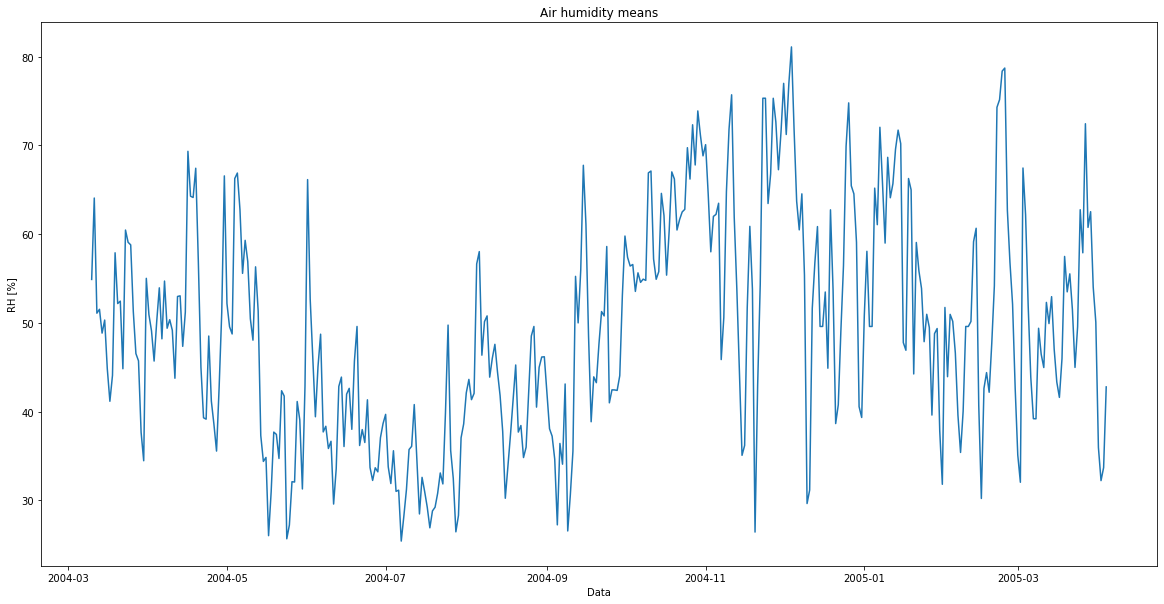

In [12]:
# Plot
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Date'],y=df['RH'])
plt.title('Air humidity means')
plt.xlabel('Data')
plt.ylabel('RH [%]')

In [13]:
# Counting outliers using zscore, there are none
np.count_nonzero(zscore(df['RH'])>3)

0

<AxesSubplot:>

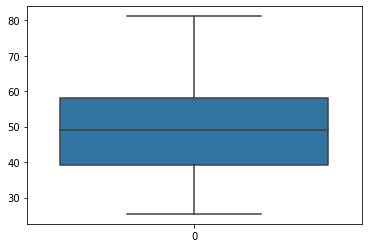

In [14]:
# The same with the boxplot
sns.boxplot(data=df['RH'])

In [15]:
# I want to show the 1% of the biggest and smallest observations
QL = df['RH'].quantile(.01)
QH = df['RH'].quantile(.99)
# Making an Outlier column with value True if this condition is met
df['Outlier'] = (df['RH'] < QL) | (df['RH'] > QH)

In [16]:
# Getting the indices
indices = df.index[df['Outlier'] == True]

Text(0, 0.5, 'RH [%]')

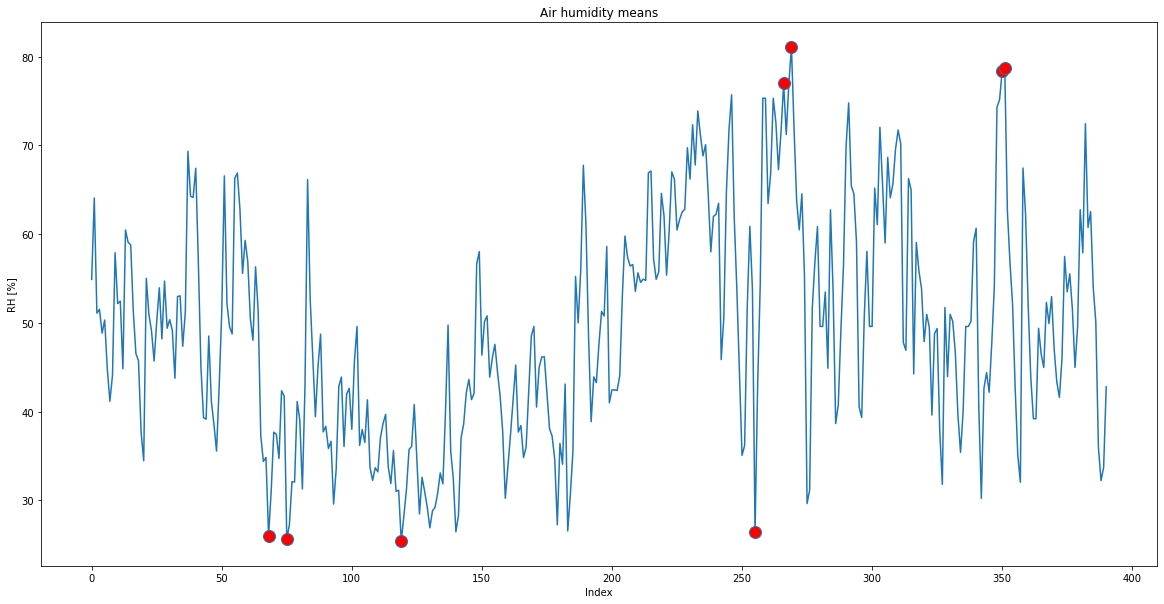

In [17]:
# Plot
sns.set_style
plt.figure(figsize=(20,10))
plt.plot(df.index,df['RH'],marker='o',markevery=indices,markerfacecolor='red', markersize=12)
plt.title('Air humidity means')
plt.xlabel('Index')
plt.ylabel('RH [%]')

In [18]:
# It turns out that temperature also has empty values which affects the plot
# I reload the data modyfing the column T

In [19]:
df = pd.read_csv('AirQualityUCI.csv',sep=";",decimal=',')
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

rh = df[df['RH']> -200]
rh_mean = rh['RH'].median()

tdf = df[df['T']> -200]
t_mean = tdf['T'].median()

df['RH'].replace(-200,rh_mean,inplace=True)
df['T'].replace(-200,t_mean,inplace=True)

df = df.groupby('Date').mean().reset_index()

<AxesSubplot:xlabel='T', ylabel='Count'>

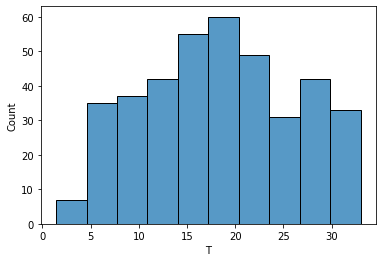

In [20]:
# With the prepared data I make a histogram of the T variable. From the shape
# you can see most values are from the range of 13-23
sns.histplot(data=df['T'])

<AxesSubplot:>

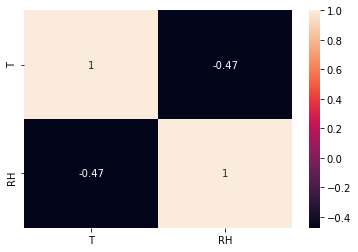

In [21]:
corr = (df[['T','RH']]).corr()
sns.heatmap(corr, annot=True)

In [22]:
# Variables T and RH has correlation coefficient of -0.47.